In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
import matplotlib.image as mpimg
import matplotlib as mpl

# Import API key
from api_keys import g_key

In [12]:
stats = '../raw_data/2019-20_TEAMSTATS.csv'
stats_df =pd.read_csv(stats)
stats_df.head()

,Unnamed: 0,Abr,Team Name,Conference,Wins,Losses,Win Pct,FG % (2pt),FG% (3pt),Total FG%,Turnovers Committed,Points Scored,Poinst Against
0,0,ATL,Hawks,East,20,47,0.299,52.5,33.3,44.9,15.7,111.8,119.8
1,1,BOS,Celtics,East,43,21,0.672,51.9,36.3,45.9,13.0,113.0,106.7
2,2,BRO,Nets,East,30,34,0.469,51.9,34.0,44.4,14.8,110.8,111.4
3,3,CHA,Hornets,East,23,42,0.354,48.9,35.2,43.4,13.9,102.9,109.6
4,4,CHI,Bulls,East,22,43,0.338,51.1,34.7,44.6,14.6,106.8,109.9


In [13]:
stats_df = stats_df.drop(columns=["Unnamed: 0"])
stats_df.head()

,Abr,Team Name,Conference,Wins,Losses,Win Pct,FG % (2pt),FG% (3pt),Total FG%,Turnovers Committed,Points Scored,Poinst Against
0,ATL,Hawks,East,20,47,0.299,52.5,33.3,44.9,15.7,111.8,119.8
1,BOS,Celtics,East,43,21,0.672,51.9,36.3,45.9,13.0,113.0,106.7
2,BRO,Nets,East,30,34,0.469,51.9,34.0,44.4,14.8,110.8,111.4
3,CHA,Hornets,East,23,42,0.354,48.9,35.2,43.4,13.9,102.9,109.6
4,CHI,Bulls,East,22,43,0.338,51.1,34.7,44.6,14.6,106.8,109.9


In [14]:

for index, row in stats_df.iterrows():
    diff = row["Points Scored"] - row["Poinst Against"]
    stats_df.loc[index, 'Points_Diff'] = diff
stats_df.head()

,Abr,Team Name,Conference,Wins,Losses,Win Pct,FG % (2pt),FG% (3pt),Total FG%,Turnovers Committed,Points Scored,Poinst Against,Points_Diff
0,ATL,Hawks,East,20,47,0.299,52.5,33.3,44.9,15.7,111.8,119.8,-8.0
1,BOS,Celtics,East,43,21,0.672,51.9,36.3,45.9,13.0,113.0,106.7,6.3
2,BRO,Nets,East,30,34,0.469,51.9,34.0,44.4,14.8,110.8,111.4,-0.6
3,CHA,Hornets,East,23,42,0.354,48.9,35.2,43.4,13.9,102.9,109.6,-6.7
4,CHI,Bulls,East,22,43,0.338,51.1,34.7,44.6,14.6,106.8,109.9,-3.1


In [51]:
east_stats_df = stats_df.loc[(stats_df["Conference"] == "East")]
east_stats_df = east_stats_df.sort_values(by=["Wins", "Win Pct", "Total FG%"], ascending=False)
east_stats_df= east_stats_df.reset_index(drop=True)
east_best8 = east_stats_df[: 8]
east_best8.to_csv('../py_data/east_best8.csv',index=False, header=True)
east_best8

,Abr,Team Name,Conference,Wins,Losses,Win Pct,FG % (2pt),FG% (3pt),Total FG%,Turnovers Committed,Points Scored,Poinst Against,Points_Diff
0,MIL,Bucks,East,53,12,0.815,56.6,35.6,47.7,14.4,118.6,107.4,11.2
1,TOR,Raptors,East,46,18,0.719,52.1,37.1,45.8,13.6,113.0,106.5,6.5
2,BOS,Celtics,East,43,21,0.672,51.9,36.3,45.9,13.0,113.0,106.7,6.3
3,MIA,Heat,East,41,24,0.631,53.0,38.3,46.9,13.9,112.2,108.9,3.3
4,IND,Pacers,East,39,26,0.600,52.8,36.3,47.7,12.5,109.3,107.4,1.9
5,PHI,76ers,East,39,26,0.600,52.3,36.2,46.5,13.4,109.6,107.3,2.3
6,BRO,Nets,East,30,34,0.469,51.9,34.0,44.4,14.8,110.8,111.4,-0.6
7,ORL,Magic,East,30,35,0.462,49.9,34.1,44.2,12.0,106.4,107.2,-0.8


In [50]:
west_stats_df = stats_df.loc[(stats_df["Conference"] == "West")]
west_stats_df = west_stats_df.sort_values(by=["Wins", "Win Pct", "Total FG%"], ascending=False)
west_stats_df= west_stats_df.reset_index(drop=True)
west_best8 = west_stats_df[: 8]
west_best8.to_csv('../py_data/west_best8.csv',index=False, header=True)
west_best8


,Abr,Team Name,Conference,Wins,Losses,Win Pct,FG % (2pt),FG% (3pt),Total FG%,Turnovers Committed,Points Scored,Poinst Against,Points_Diff
0,LAL,Lakers,West,49,14,0.778,55.6,35.5,48.5,14.5,114.3,106.9,7.4
1,LAC,Clippers,West,44,20,0.688,52.1,36.6,46.4,14.1,116.2,109.6,6.6
2,DEN,Nuggets,West,43,22,0.662,52.9,35.8,47.1,12.9,110.4,107.4,3.0
3,UTA,Jazz,West,41,23,0.641,53.8,38.3,47.5,14.3,111.0,107.9,3.1
4,OKL,Thunder,West,40,24,0.625,53.6,35.5,47.3,12.7,110.8,108.3,2.5
5,HOU,Rockets,West,40,24,0.625,55.4,34.8,45.4,14.1,118.1,114.4,3.7
6,DAL,Mavericks,West,40,27,0.597,54.3,36.9,46.2,12.2,116.4,110.4,6.0
7,MEM,Grizzlies,West,32,33,0.492,53.1,35.2,47.0,14.6,112.6,113.7,-1.1


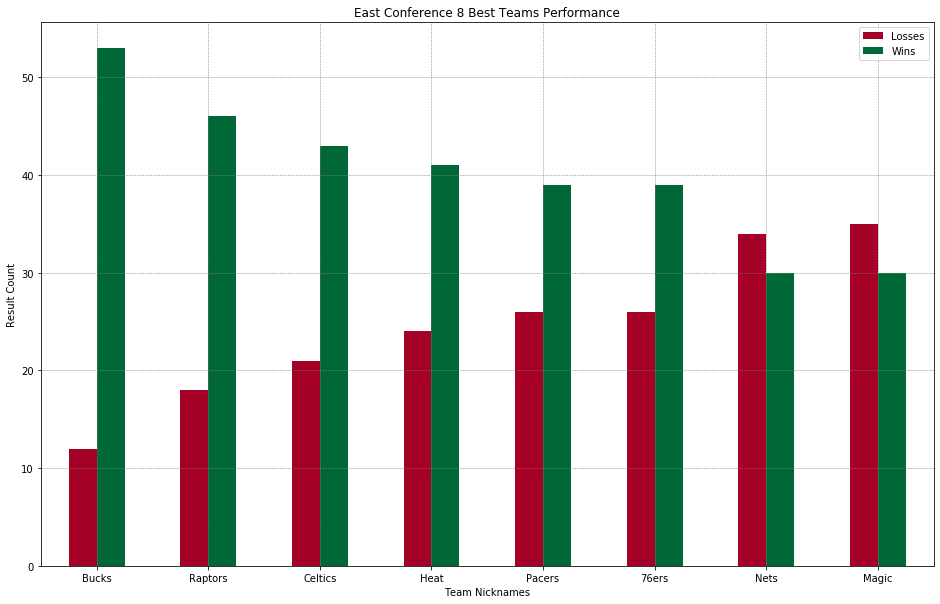

In [71]:
# Make a bar graph with wins in green and losses in red for East Conference
east_winloss = east_best8[["Team Name","Losses", "Wins"]]
x_axis= np.arange(len(east_winloss))
east_winloss.plot(kind='bar', figsize=(16,10), colormap = 'RdYlGn')
plt.grid(linestyle='--',linewidth='0.5', color='grey')
tick_locations = [team for team in x_axis]
plt.xticks(tick_locations, east_winloss['Team Name'], rotation='horizontal')
plt.title('East Conference 8 Best Teams Performance')
plt.xlabel("Team Nicknames")
plt.ylabel("Result Count")

# Save the figure
plt.savefig("../py_data/East_Conference_8_Best_Teams_Performance.png")

plt.show()


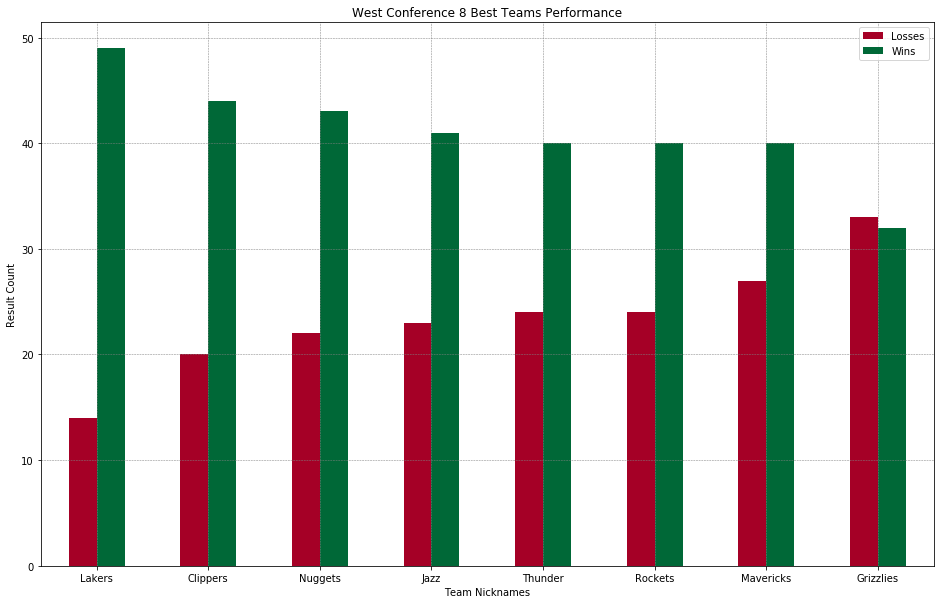

In [70]:
# Make a bar graph with wins in green and losses in red for West Conference
west_winloss = west_best8[["Team Name","Losses", "Wins"]]
x_axis= np.arange(len(west_winloss))
west_winloss.plot(kind='bar', figsize=(16,10), colormap = 'RdYlGn')
plt.grid(linestyle='--',linewidth='0.5', color='grey')
tick_locations = [team for team in x_axis]
plt.xticks(tick_locations, west_winloss['Team Name'], rotation='horizontal')
plt.title('West Conference 8 Best Teams Performance')
plt.xlabel("Team Nicknames")
plt.ylabel("Result Count")

# Save the figure
plt.savefig("../py_data/West_Conference_8_Best_Teams_Performance.png")

plt.show()